In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import cv2
import os

def extract_frames(video_path, output_folder, fps=2):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Open the video file
    video = cv2.VideoCapture(video_path)

    if not video.isOpened():
        print(f"Error: Could not open video {video_path}")
        return

    # Get video properties
    video_fps = video.get(cv2.CAP_PROP_FPS)
    frame_interval = int(video_fps // fps)

    frame_count = 0
    save_count = 0

    while True:
        ret, frame = video.read()
        if not ret:
            break

        if frame_count % frame_interval == 0:
            save_path = os.path.join(output_folder, f"frame_{save_count:05d}.jpg")
            cv2.imwrite(save_path, frame)
            print(f"Saved {save_path}")
            save_count += 1

        frame_count += 1

    video.release()
    print("Frame extraction completed.")

# Example usage
video_path = '/content/drive/MyDrive/shark_tag/DJI_0008.MOV'
output_folder = ''
extract_frames(video_path, output_folder)


Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00000.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00001.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00002.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00003.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00004.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00005.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00006.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00007.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00008.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00009.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00010.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00011.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00012.jpg
Saved /content/drive/MyDrive/shark_tag/008_images/False/frame_00

In [ ]:
import os
import csv

def save_image_paths_to_csv(true_folder, false_folder, csv_output_path):
    data = []

    # Process images with the object (True)
    for image_name in os.listdir(true_folder):
        if image_name.endswith(('.JPG', '.png')):
            image_path = os.path.join(true_folder, image_name)
            data.append([image_path, True])

    # Process images without the object (False)
    for image_name in os.listdir(false_folder):
        if image_name.endswith(('.JPG', '.png')):
            image_path = os.path.join(false_folder, image_name)
            data.append([image_path, False])

    # Save to CSV
    with open(csv_output_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['image_path', 'label'])
        writer.writerows(data)

    print(f"CSV file saved to {csv_output_path}")

# Example usage
true_folder = '/content/drive/MyDrive/shark_tag/images_true'
false_folder = '/content/drive/MyDrive/shark_tag/images_false'
csv_output_path = '/content/drive/MyDrive/shark_tag/training_data_iphone.csv'

save_image_paths_to_csv(true_folder, false_folder, csv_output_path)


CSV file saved to /content/drive/MyDrive/shark_tag/training_data_iphone.csv


In [ ]:
import os
import csv

def save_image_paths_to_csv(true_folders, false_folders, csv_output_path):
    data = []

    # Process images with the object (True)
    for folder in true_folders:
        for image_name in os.listdir(folder):
            if image_name.endswith(('.JPG', '.jpg')):
                image_path = os.path.join(folder, image_name)
                data.append([image_path, True])

    # Process images without the object (False)
    for folder in false_folders:
        for image_name in os.listdir(folder):
            if image_name.endswith(('.JPG', '.jpg')):
                image_path = os.path.join(folder, image_name)
                data.append([image_path, False])

    # Save to CSV
    with open(csv_output_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['image_path', 'label'])
        writer.writerows(data)

    print(f"CSV file saved to {csv_output_path}")

# Example usage
true_folders = ['/content/drive/MyDrive/shark_tag/images_true', '/content/drive/MyDrive/shark_tag/010_images/True','/content/drive/MyDrive/shark_tag/008_images/True','/content/drive/MyDrive/shark_tag/007_images/True']
false_folders = ['/content/drive/MyDrive/shark_tag/images_false', '/content/drive/MyDrive/shark_tag/010_images/False','/content/drive/MyDrive/shark_tag/008_images/False','/content/drive/MyDrive/shark_tag/007_images/False']
csv_output_path = '/content/drive/MyDrive/shark_tag/training_data_iphone_drone_v1.csv'

save_image_paths_to_csv(true_folders, false_folders, csv_output_path)


CSV file saved to /content/drive/MyDrive/shark_tag/training_data_iphone_drone_v1.csv


In [ ]:
import csv
import random

def balance_dataset(csv_input_path, csv_output_path):
    true_entries = []
    false_entries = []

    # Read the CSV file and separate true and false entries
    with open(csv_input_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Skip the header row
        for row in reader:
            if row[1].lower() == 'true':
                true_entries.append(row)
            elif row[1].lower() == 'false':
                false_entries.append(row)

    # Determine the smaller count
    min_count = min(len(true_entries), len(false_entries))

    # Randomly sample to balance the dataset
    balanced_true_entries = random.sample(true_entries, min_count)
    balanced_false_entries = random.sample(false_entries, min_count)

    # Combine the balanced entries
    balanced_data = balanced_true_entries + balanced_false_entries

    # Shuffle the combined data
    random.shuffle(balanced_data)

    # Save the balanced data to a new CSV file
    with open(csv_output_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(header)  # Write the header row
        writer.writerows(balanced_data)

    print(f"Balanced CSV file saved to {csv_output_path}")
    print(f"Balanced dataset contains {min_count} True and {min_count} False entries.")

# Example usage
csv_input_path = '/content/drive/MyDrive/shark_tag/training_data_iphone_drone_v1.csv'
csv_output_path = '/content/drive/MyDrive/shark_tag/training_data_iphone_drone_balanced_v1.csv'

balance_dataset(csv_input_path, csv_output_path)


Balanced CSV file saved to /content/drive/MyDrive/shark_tag/training_data_iphone_drone_balanced_v1.csv
Balanced dataset contains 810 True and 810 False entries.


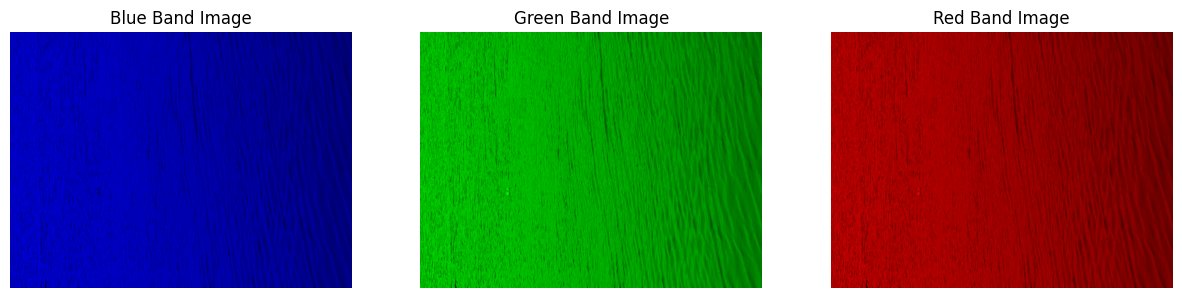

In [ ]:
import matplotlib.pyplot as plt
import cv2

def show_color_bands(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert from BGR (OpenCV default) to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the red band
    red_band = image_rgb.copy()
    red_band[:, :, 1] = 0  # Set the green channel to 0
    red_band[:, :, 2] = 0  # Set the blue channel to 0

    # Extract the green band
    green_band = image_rgb.copy()
    green_band[:, :, 0] = 0  # Set the red channel to 0
    green_band[:, :, 2] = 0  # Set the blue channel to 0

    # Extract the blue band
    blue_band = image_rgb.copy()
    blue_band[:, :, 0] = 0  # Set the red channel to 0
    blue_band[:, :, 1] = 0  # Set the green channel to 0

    # Create a figure to display the images
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Display the blue band image
    ax[0].imshow(blue_band)
    ax[0].set_title('Blue Band Image')
    ax[0].axis('off')

    # Display the green band image
    ax[1].imshow(green_band)
    ax[1].set_title('Green Band Image')
    ax[1].axis('off')

    # Display the red band image
    ax[2].imshow(red_band)
    ax[2].set_title('Red Band Image')
    ax[2].axis('off')

    # Show the images
    plt.show()

# Example usage

# Example usage
image_path = '/content/drive/MyDrive/shark_tag/images_true/IMG_7541_yellow.JPG'
show_color_bands(image_path)


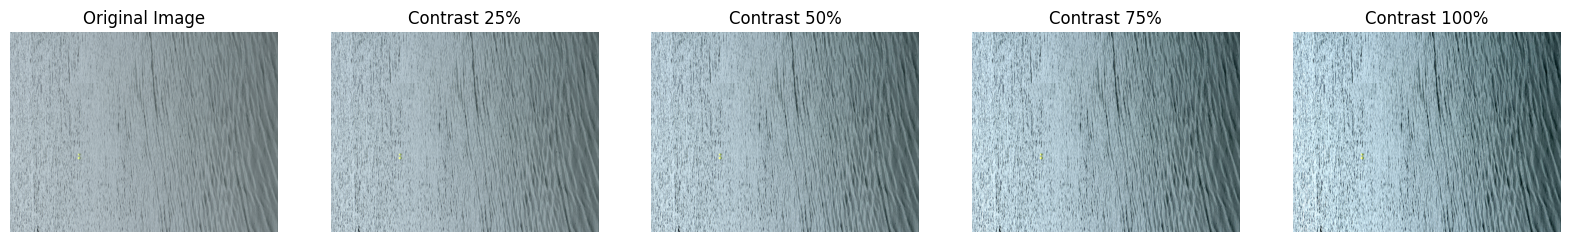

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
import numpy as np

def increase_contrast(image, contrast_factor):
    """
    Increase the contrast of an image.

    Parameters:
        image (PIL.Image.Image): Input image in PIL format.
        contrast_factor (float): Factor of contrast to apply. 1.0 means original image.

    Returns:
        PIL.Image.Image: Contrast-enhanced image.
    """
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(contrast_factor)

def show_contrast_levels(image_path):
    # Read the image
    image = Image.open(image_path)

    # Define contrast levels
    contrast_levels = [0.25, 0.50, 0.75, 1.0]

    # Create a figure to display the images
    fig, ax = plt.subplots(1, 5, figsize=(20, 5))

    # Display the original image
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    # Display contrast-enhanced images
    for i, level in enumerate(contrast_levels):
        contrast_image = increase_contrast(image, 1 + level)
        ax[i + 1].imshow(contrast_image)
        ax[i + 1].set_title(f'Contrast {int(level * 100)}%')
        ax[i + 1].axis('off')

    # Show the images
    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/shark_tag/images_true/IMG_7541_yellow.JPG'
show_contrast_levels(image_path)


In [2]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.preprocessing.image import load_img
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import tensorflow as tf


In [3]:
import tensorflow as tf

# Check if GPU/TPU is available and being used
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
elif 'TPU' in tf.config.list_physical_devices():
    print("TPU is available")
else:
    print("Using CPU")

!nvidia-smi --query-gpu=gpu_name --format=csv


GPU is available
name
NVIDIA A100-SXM4-40GB


In [4]:
#Define Labels
labels_data = '/content/drive/MyDrive/shark_tag/training_data_iphone_drone_balanced_v1.csv'
# Define Labels and Output Model Name
# labels_data = '/Users/jacobstasiewicz/Documents/ORISE/blurry_CNN/training_images_v3.csv'
output_model = '/content/drive/MyDrive/shark_tag/model_out/inceptionv3_model_v2_0_0809.h5'
size = 512

In [5]:
# Load the CSV file
# data = pd.read_csv(labels_data)

# Resize and Normalize Images
def resize_normalize(image_path):
    img = load_img(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None
    img = img_to_array(img)
    img = tf.image.resize(img, (size, size))
    img = img / 255.0
    img = (img - 0.5) * 2.0
    return img

# Data Augmentation
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)

# Callbacks
simp_callback = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.2,
    patience=10,
    min_lr=0.0001
)

In [6]:
data = pd.read_csv(labels_data)

data['Image_Array'] = data['image_path'].apply(resize_normalize)
data = data.dropna()
data_X = np.stack(data['Image_Array'].to_numpy())
data_y = data['label'].astype(int).values


In [7]:
# print(sand_X[1])
print(data_X.shape)
# print(realblur_X.shape)

(1620, 512, 512, 3)


In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(data_X, data_y, test_size=0.29, stratify=data_y, random_state=42) #test size is weird to ensure equal split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.48, stratify=y_temp, random_state=42)

In [9]:
print(f"Training samples: {len(X_train)}, True (0s): {sum(y_train == 0)}, False (1s): {sum(y_train == 1)}")
print(f"Validation samples: {len(X_val)}, True (0s): {sum(y_val == 0)}, False (1s): {sum(y_val == 1)}")

Training samples: 1150, True (0s): 575, False (1s): 575
Validation samples: 244, True (0s): 122, False (1s): 122


In [10]:
augmented_X_train = []
augmented_y_train = []

data_set_multiple = 5# Do you want to 2x your dataset? 3x?

for class_index in np.unique(y_train):
    class_samples = X_train[y_train == class_index]
    class_labels = y_train[y_train == class_index]
    samples_needed = len(class_samples) * (data_set_multiple - 1)
    samples_generated = 0

    print(f"Class {class_index}: {len(class_samples)} samples, need {samples_needed} augmented samples")

    while samples_generated < samples_needed:
        for batch in datagen.flow(class_samples, class_labels, batch_size=16, shuffle=False):
            augmented_X_train.extend(batch[0])
            augmented_y_train.extend(batch[1])
            samples_generated += len(batch[0])
            print(f"Generated {samples_generated}/{samples_needed} samples for class {class_index}")
            if samples_generated >= samples_needed:
                break

Class 0: 575 samples, need 2300 augmented samples
Generated 16/2300 samples for class 0
Generated 32/2300 samples for class 0
Generated 48/2300 samples for class 0
Generated 64/2300 samples for class 0
Generated 80/2300 samples for class 0
Generated 96/2300 samples for class 0
Generated 112/2300 samples for class 0
Generated 128/2300 samples for class 0
Generated 144/2300 samples for class 0
Generated 160/2300 samples for class 0
Generated 176/2300 samples for class 0
Generated 192/2300 samples for class 0
Generated 208/2300 samples for class 0
Generated 224/2300 samples for class 0
Generated 240/2300 samples for class 0
Generated 256/2300 samples for class 0
Generated 272/2300 samples for class 0
Generated 288/2300 samples for class 0
Generated 304/2300 samples for class 0
Generated 320/2300 samples for class 0
Generated 336/2300 samples for class 0
Generated 352/2300 samples for class 0
Generated 368/2300 samples for class 0
Generated 384/2300 samples for class 0
Generated 400/2300 s

(4600, 512, 512, 3)
(4600,)


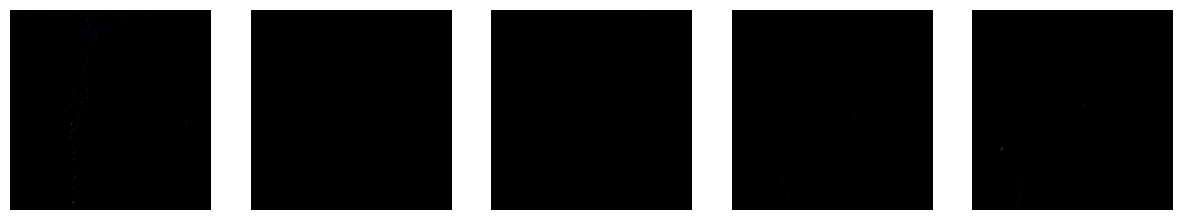

[1 0 0 1 1]


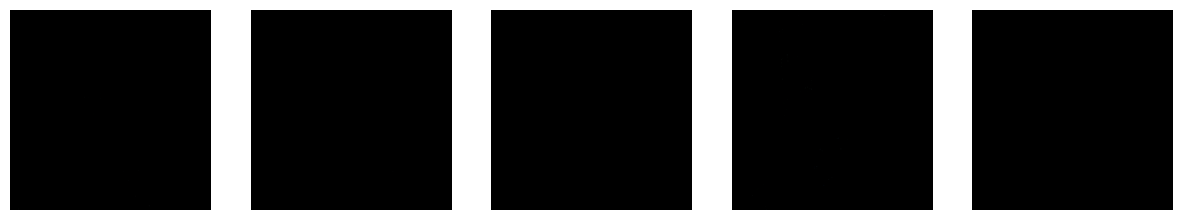

[0 0 0 0 0]


In [11]:
augmented_X_train = np.array(augmented_X_train)
augmented_y_train = np.array(augmented_y_train)
print(augmented_X_train.shape)
print(augmented_y_train.shape)

def display_images(images, start, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(start,num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Display the first 5 augmented images
display_images(X_train, 0, num_images=5)
print(y_train[:5])
display_images(augmented_X_train, 0, num_images=5)
print(augmented_y_train[:5])

In [12]:
X_train_aug = np.concatenate([X_train, augmented_X_train])
y_train_aug = np.concatenate([y_train, augmented_y_train])

In [13]:
print(X_train_aug.shape)
print(y_train_aug.shape)
print(f"Training samples: {len(X_train_aug)}, True (0s): {sum(y_train_aug == 0)}, False (1s): {sum(y_train_aug == 1)}")

(5750, 512, 512, 3)
(5750,)
Training samples: 5750, True (0s): 2875, False (1s): 2875


In [10]:
# from tensorflow.keras import layers
# # Transfer Learning with MobileNetV2
from tensorflow.keras import layers
from keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape=(512, 512, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = layers.Dropout(0.5)(x)
x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
x = layers.Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
# model.summary()

history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val),
    callbacks=[simp_callback, reduce_lr]
)


Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - binary_accuracy: 0.6485 - loss: 0.9191 - val_binary_accuracy: 0.7910 - val_loss: 0.6133 - learning_rate: 0.0010
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - binary_accuracy: 0.8293 - loss: 0.5351 - val_binary_accuracy: 0.8730 - val_loss: 0.4397 - learning_rate: 0.0010
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - binary_accuracy: 0.9030 - loss: 0.3921 - val_binary_accuracy: 0.8566 - val_loss: 0.4456 - learning_rate: 0.0010
Epoch 4/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - binary_accuracy: 0.9123 - loss: 0.3541 - val_binary_accuracy: 0.9098 - val_loss: 0.3862 - learning_rate: 0.0010
Epoch 5/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - binary_accuracy: 0.9010 - loss: 0.3610 - val_binary_accuracy: 0.8893 - val_loss: 0.3784 - learning_rate: 0.0010
Epoch 6/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - binary_accuracy: 0.9178 - loss: 0.3366 - val_binary_accuracy: 0.8648 - val_loss: 0.4288 - learning_rate: 0.0010
Epoch

In [11]:
model.save(output_model)

In [12]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step


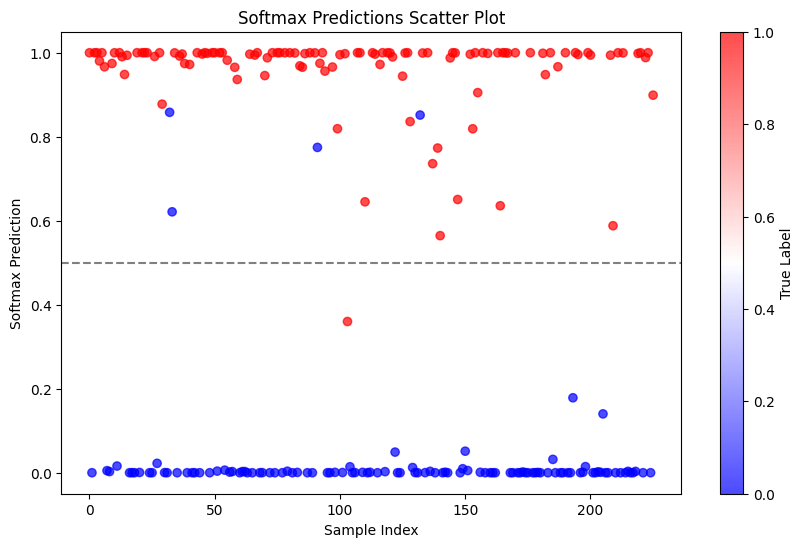

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred[:, 0], c=y_test, cmap='bwr', alpha=0.7)
plt.axhline(0.5, color='grey', linestyle='--')  # Threshold line
plt.colorbar(label='True Label')
plt.xlabel('Sample Index')
plt.ylabel('Softmax Prediction')
plt.title('Softmax Predictions Scatter Plot')
plt.show()

Accuracy: 0.98
Precision: 0.97
Recall: 0.99
F1-score: 0.98
Confusion Matrix:
[[109   4]
 [  1 112]]


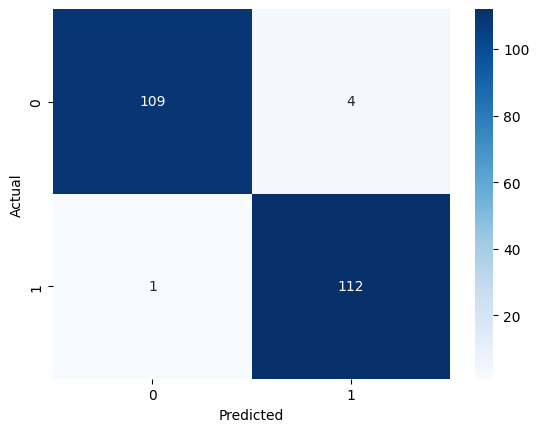

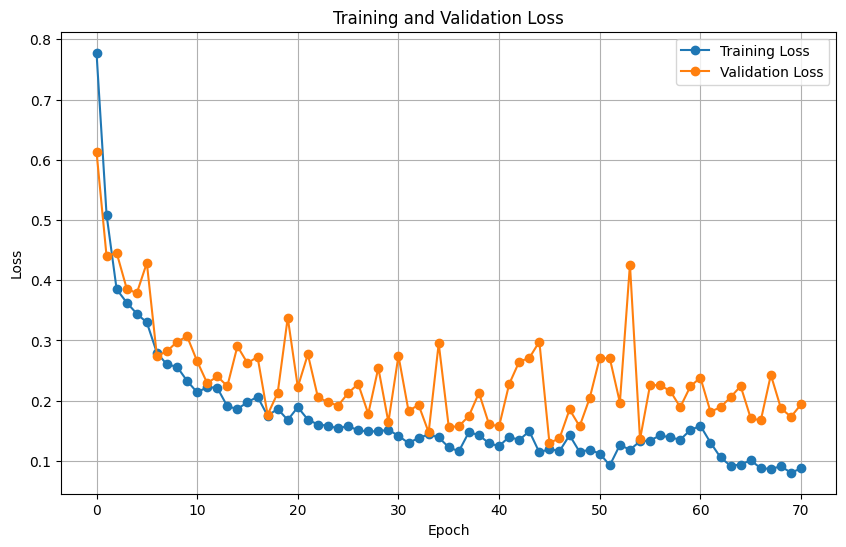

In [14]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Plot train loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot to visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()